# 第16章 使用列表
列表可能是Scala程序中最常使用的数据结构了。本章将对列表做详细的介绍。我们会讲到很多可以对列表好执行的操作。我们还将对使用列表的一些重要的程序设计原则做出讲解。

## 16.1 List字面量
我们在前面的章节已经介绍过列表，一个包含元素＇a＇、＇b＇和＇c＇的列表写作List（＇a＇, ＇b＇, ＇c＇）。以下是另外一些例子：

In [130]:
val fruit = List("apples", "oranges", "pears")

fruit: List[String] = List("apples", "oranges", "pears")

In [131]:
val nums = List(1, 2, 3, 4)

nums: List[Int] = List(1, 2, 3, 4)

In [132]:
val diags3 = List(
    List(1,0,0),
    List(0,1,0),
    List(0,0,1)
)

diags3: List[List[Int]] = List(List(1, 0, 0), List(0, 1, 0), List(0, 0, 1))

In [133]:
val empty: List[Nothing] = List()

empty: List[Nothing] = List()

Scala的列表类型是协变（covariant）的。意思是对每一组类型S和T，如果S是T的子类型，那么List[S]就是List[T]的子类型。例如，List[String]是List[Object]的子类型。因为每个字符串列表也都可以被当作对象列表，这很自然。[2]
注意，空列表的类型为List[Nothing]。在11.3节我们讲过，在Scala的类继承关系中，Nothing是底类型。由于列表是协变的，对于任何T而言，List[Nothing]都是List[T]的子类型。因此既然空列表对象的类型为List[Nothing]，可以被当作是其他形如List[T]类型的对象。这也是为什么编译器允许我们编写如下的代码：


In [134]:
//List()也是List[String]类型
val xs: List[String] = List()

xs: List[String] = List()

## 16.3 构建列表
所有的列表都构建自两个基础的构建单元：N i l和∷（读作“cons”）。Nil表示空列表。中缀操作符：：表示在列表前追加元素。也就是说，x :: xs表示这样一个列表：第一个元素为x，接下来是列表xs的全部元素。因此，前面的列表值也可以这样来定义：


In [135]:
val fruit = "apples" :: ("oranges" :: ("pears" :: Nil))

fruit: List[String] = List("apples", "oranges", "pears")

In [136]:
val nums  = 1 :: (2 :: (3 :: (4 :: Nil)))

nums: List[Int] = List(1, 2, 3, 4)

In [137]:
val diag3 = (1 :: (0 :: (0 :: Nil))) ::
            (0 :: (1 :: (0 :: Nil))) ::
            (0 :: (0 :: (1 :: Nil))) :: Nil

diag3: List[List[Int]] = List(List(1, 0, 0), List(0, 1, 0), List(0, 0, 1))

In [138]:
val empty = Nil

empty: Nil.type = List()

事实上，之前我们用List（...）对fruit、nums、diag3和empty的定义，不过是最终展开成上面这些定义的包装方法而已。例如，List（1, 2, 3）创建的列表就是 1 :: （2 :: （3 :: Nil））。
由于：：以冒号结尾，:：这个操作符是右结合的：A :: B :: C会被翻译成 A :: （B :: C）。因此，我们可以在前面的定义中去掉圆括号。例如：


In [139]:
val nums = 1 :: 2 :: 3 :: 4 :: Nil

nums: List[Int] = List(1, 2, 3, 4)

跟之前的nums定义是等效的。

## 16.4 列表的基本操作
对列表的所有操作都可以用下面这三项来表述：  
head 返回列表的第一个元素  
tail 返回列表中除第一个元素之外的所有元素  
isEmpty 返回列表是否为空列表  
这些操作在List类中定义为方法。表16.1给出了一些例子。head和tail方法只对非空列表有定义。当我们从一个空列表调用时，它们将抛出异常：

```scala
Nil.head

java.util.NoSuchElementException: head of empty list
  scala.collection.immutable.Nil$.head(List.scala:629)
  ammonite.$sess.cmd10$Helper.<init>(cmd10.sc:1)
  ammonite.$sess.cmd10$.<clinit>(cmd10.sc:7)
```

作为如何处理列表的例子，考虑按升序排列一个数字列表的元素。一个简单的做法是插入排序（insertion sort），这个算法的工作原理如下：对于非空列表x :: xs，先对xs排序，然后将第一个元素x插入到这个排序结果中正确的位置。
<center>表16.1 基本的列表操作</center>

|操作|这个操作做什么|
|-|-|
|empty.isEmpty|返回true|
|fruit.isEmpty|返回false|
|fruit.head|返回"apple"|
|fruit.tail.head|返回"oranges"|
|diag3.head|返回List(1,0,0)|

对一个空列表排序交出空列表。用Scala代码来表示，这个插入排序算法是这样的：

In [140]:
def isort(xs: List[Int]): List[Int] = 
    if(xs.isEmpty) Nil
    else insert(xs.head, isort(xs.tail))

def insert(x: Int, xs: List[Int]): List[Int] = 
    if (xs.isEmpty || x < xs.head) x :: xs
    else xs.head :: insert(x, xs.tail)

defined function isort
defined function insert

In [141]:
val list=List(4,6,1,5,0)

list: List[Int] = List(4, 6, 1, 5, 0)

In [142]:
isort(list)

res141: List[Int] = List(0, 1, 4, 5, 6)

## 16.5 列表模式
列表也可以用模式匹配解开。列表模式可以逐一对应到列表表达式。我们既可以用List（...）这样的模式来匹配列表的所有元素，也可以用：：操作符和Nil常量一点点地将列表解开。
以下是第一种模式的例子：


In [143]:
val List(a,b,c) = fruit

a: String = "apples"
b: String = "oranges"
c: String = "pears"

List（a, b, c）这个模式匹配长度为3的列表，并将三个元素分别绑定到模式变量a、b和c。如果我们事先并不知道列表中元素的个数，更好的做法是用：：来匹配。举例来说，a :: b :: rest匹配的是长度大于等于2的列表：

In [144]:
val a::b::rest = fruit

a: String = "apples"
b: String = "oranges"
rest: List[String] = List("pears")

### 关于List的模式匹配
如果回顾第15章介绍过的可能出现的模式的形式，你会发现不论List（...）还是：：都不满足那些定义。事实上，List（...）是一个由类库定义的**提取器（extractor）**模式的实例。我们将在第26章介绍提取器模式。而x :: xs这样的“cons”模式是中缀操作模式的一个特例。作为表达式，中缀操作等同于一次方法调用。对模式而言，规则是不同的：作为模式，p op q这样的中缀操作等同于op（p, q）。也就是说，中缀操作符op是被当作构造方法模式处理的。具体来说， x :: xs这个表达式相当于∷（x, xs）。
这里透露出一个细节，应该有一个名为：：的类与这个模式构造方法相对应。的确有这么一个类，它的名字叫scala.::，并且就是用来构建非空列表的。因此：：在Scala中出现了两次，一次是作为scala包中的一个类的名字，一次是在List类的方法名。:：方法的作用是产出一个scala.:：类的实例。在第22章将会介绍更多关于List类的实现细节。
使用模式是用基本方法head、tail和isEmpty来解开列表的变通方式。例如，我们再次实现插入排序，不过这一次，我们用模式匹配：


In [145]:
def isort(xs: List[Int]): List[Int] = xs match {
    case List()   => List() //如果是空列表则直接返回
    case x :: xs1 => insert(x, isort(xs1)) //如果不是空列表，调用insert函数，参数为列表head与tail的递归
}

def insert(x: Int, xs: List[Int]): List[Int] = xs match {
    //如果发现xs为空列表，说明已经是最后一个元素了，返回以该元素组成的List即可
    case List()   => List(x) 
    //如果xs不为空列表，比较传入元素与xs.head的大小，如果传入元素比xs.head小，返回原值，否则
    case y :: ys  => if(x <= y) x :: xs else y :: insert(x, ys) 
}

defined function isort
defined function insert

In [146]:
val list=List(4,6,1,5,0)
isort(list)

list: List[Int] = List(4, 6, 1, 5, 0)
res145_1: List[Int] = List(0, 1, 4, 5, 6)

通常，对列表做模式匹配比用方法来解构更清晰，因此模式匹配应该成为你处理列表的工具箱的一部分。

以上是在正确使用Scala列表之前你需要知道的全部内容。不过，Scala还提供了大量方法，捕获了列表操作的通用模式。这些方法让列表处理程序更为精简，通常也更为清晰。接下来的两节，我们将介绍List类中最为重要的方法。


## 16.6 List类的初阶方法
本节将会介绍定义在List类里的大部分初阶方法。如果一个方法不接收任何函数作为入参，就被称为初阶（first-order）方法。我们还将用两个例子来介绍如何组织操作列表的程序的一些技巧。

### 拼接两个列表
跟`::`操作相似的一个操作是拼接，写`:::`。不同`::`,`:::`接收两个列表参数作为操作元。`xs ::: ys`的结果是一个包含了xs所有元素，加上ys所有元素的新列表。

这里有一些例子：


In [147]:
List(1,2) ::: List(3,4,5)

res146: List[Int] = List(1, 2, 3, 4, 5)

In [148]:
List() ::: List(1,2,3)

res147: List[Int] = List(1, 2, 3)

In [149]:
List(1,2,3) ::: List(4)

res148: List[Int] = List(1, 2, 3, 4)

跟cons类似，列表的拼接操作也是右结合的。像这样一个表达式：
`xs ::: ys ::: zs`
会被解读为：
`xs ::: (ys ::: zs)`

### 分治（Divide and Conquer）原则
拼接（:::）是作为List类的一个方法实现的。我们也可以通过对列表进行模式匹配来“手工”实现拼接。我们建议你自己做一下尝试，因为这个过程展示了用列表实现算法的常用方式。首先，我们明确一下拼接方法（我们叫它append）的签名。为了不把事情搞得过于复杂，我们假定append是在List类之外定义的，这样它就需要接收两个待拼接的列表作为参数。这两个列表必须有相同的元素类型，但这个类型具体是什么并不重要。可以给append指定一个代表两个列表的元素类型的类型参数[3]来表达这层意思：
```scala
def append[T](xs: List[T], ys: List[T]): List[T]
```

要设计这样一个append方法，有必要回顾一下对于列表这样的递归数据结构的“分而治之”的程序设计原则。许多对列表的算法都首先会用模式匹配将输入的列表切分成更小的样例。这是设计原则中“分”的部分。然后对每个样例构建对应的结果。如果结果是一个非空的列表，那么这个列表的局部可以通过递归地调用同一个算法来构建出来。这是设计原则中“治”的部分。

把这个设计原则应用到append方法的实现，我们要问的第一个问题是匹配哪一个列表。跟其他方法相比，append方法并不简单，因为我们有两个选择。好在后续的“治”的部分告诉我们需要同时包含两个输入列表的所有元素。由于列表是从后往前构建的，ys可以保持不动，而xs则需要被解开然后追加到ys的前面。这样一来，我们有理由选择xs作为模式匹配的来源。匹配列表最常见的模式是区分空列表和非空列表。于是我们得到如下append方法的轮廓：
```scala
def append[T](xs: List[T], ys: List[T]): List[T] = xs match {
    case List() => ???
    case x :: xs1 => ???
}
```

剩下要做的便是填充由???标出的两处。[4]第一处是当输入列表xs为空时的可选分支。这个case当中拼接操作可以直接交出第二个列表：
```scala
case List() => ys
```
第二处是当输入列表xs由某个头x和尾xs1组成时的可选分支。这个case中结果也是一个非空列表。要构建一个非空列表，我们需要知道这个非空列表的头和尾分别是什么。我们已经知道结果的第一个元素是x。而余下的元素可以通过将第二个列表ys拼接在第一个列表的剩余部分即xs1之后。
这样我们就得到了完整的设计：

In [150]:
def append[T](xs: List[T], ys: List[T]): List[T] = xs match {
    case List() => ys
    case x :: xs1 => x :: append(xs1,ys)
}

defined function append

In [151]:
append(List(1,2),List(3,4))

res150: List[Int] = List(1, 2, 3, 4)

第二个可选分支的计算展示了分治原则中“治”的部分：首先思考我们想要的输出的形状是什么，然后计算这个形状当中的各个独立的组成部分，在这个过程中的必要环节递归地调用同一个算法。最后，从这些组成部分构建出最终的输出结果。
### 获取列表的长度：length
length方法计算列表的长度。

In [152]:
List(1,2,3).length

res151: Int = 3

不同于数组，在列表上的length操作相对更耗资源。找到一个列表的末尾需要遍历整个列表，因此需要消耗与元素数量成正比的时间。这也是为什么将xs.isEmpty这样的测试换成xs.length == 0并不是个好的主意。这两种测试的结果并没有区别，但第二个会更慢，尤其当列表xs很长时。
### 访问列表的末端：init和last
我们已经知道基本的操作head和tail，它们分别获取列表的首个元素和除了首个元素剩余的部分。它们也分别有一个对偶（dual）方法：last返回（非空）列表的最后一个元素，而init返回除了最后一个元素之外剩余的部分：


In [153]:
val abcde = List('a', 'b', 'c', 'd', 'e')

abcde: List[Char] = List('a', 'b', 'c', 'd', 'e')

In [154]:
abcde.init

res153: List[Char] = List('a', 'b', 'c', 'd')

In [155]:
abcde.last

res154: Char = 'e'

跟head和tail一样，这两个方法在应用到空列表的时候也会抛出异常：
```scala
List().last

java.util.NoSuchElementException: last of empty list
  scala.collection.immutable.Nil$.last(List.scala:632)
  scala.collection.immutable.Nil$.last(List.scala:628)
  ammonite.$sess.cmd24$Helper.<init>(cmd24.sc:1)
  ammonite.$sess.cmd24$.<clinit>(cmd24.sc:7)
```

不像head和tail那样在运行的时候消耗常量时间，init和last需要遍历整个列表来计算结果。因此它们的耗时跟列表的长度成正比。
最好将数据组织成大多数访问都发生在列表头部而不是尾部。

### 反转列表：reverse
如果在算法当中某个点需要频繁地访问列表的末尾，有时侯先将列表反转，再对反转后的列表做操作是更好的做法。下面是一个反转的例子：


In [156]:
abcde.reverse

res155: List[Char] = List('e', 'd', 'c', 'b', 'a')

跟所有其他列表操作一样，reverse会创建一个新的列表，而不是对传入的列表做修改。由于列表是不可变的，这样的修改就算想做我们也做不到。现在来验证一下，在reverse操作过后，abcde的原始值并没有变：

In [157]:
abcde

res156: List[Char] = List('a', 'b', 'c', 'd', 'e')

reverse、init和last操作满足一些可以用于对计算过程推理，以及让程序变得简化的法则。
1. reverse是自己的反转：
> `xs.reverse.reverse` 等于 `xs`
2. reverse将init变成tail，将last变成head，只不过元素顺序是颠倒的：
> `xs.reverse.init` 等于 `xs.tail.reverse`  
> `xs.reverse.tail` 等于 `xs.init.reverse`  
> `xs.reverse.head` 等于 `xs.last`  
> `xs.reverse.last` 等于 `xs.head`  



反转操作也可以用拼接（:::）来实现，就像下面这个方法rev：

In [158]:
def rev[T](xs: List[T]): List[T] = xs match {
    case List() => List()
    case x :: xs1 => rev(xs1) ::: List(x)
}

defined function rev

In [159]:
rev(abcde)

res158: List[Char] = List('e', 'd', 'c', 'b', 'a')

不过，这个方法的效率并不高。我们不妨来看一下rev的时间复杂度，假定xs列表长度为n。注意会有n次对rev的递归调用。除了最后一次之外，每次调用都会做列表拼接。xs ::: ys这样的列表拼接所需要的时间跟首个入参xs的长度成正比。因此，rev的整体复杂度为：

`n + (n-1) + (n-2) + ... + 1 == （n+1)*n/2`

换句话说，rev的时间复杂度是入参长度的平方阶。这跟时间复杂度为线性的可变链表的标准反转操作比起来很令人失望。不过，rev当前的实现还能做得更好。在331页的例子中，你将看到如何提高这个方法的执行速度。

### 前缀和后缀：drop、take和splitAt
drop和take是对tail和init的一般化。怎么说呢？它们返回的是列表任意长度的前缀或后缀。表达式“xs take n”返回列表xs的前n个元素。如果n大于xs.length，那么将返回整个xs列表。操作“xs drop n”返回列表xs除了前n个元素之外的所有元素。如果n大于等于xs.length，那么就返回空列表。

splitAt操作将列表从指定的下标位置切开，返回这两个列表组成的对偶。[5]它的定义来自如下这个等式：  
`xs splitAt n 等于 (xs take n,xs drop n)`

In [160]:
abcde take 2

res159: List[Char] = List('a', 'b')

In [161]:
abcde drop 2

res160: List[Char] = List('c', 'd', 'e')

In [162]:
abcde splitAt 2

res161: (List[Char], List[Char]) = (List('a', 'b'), List('c', 'd', 'e'))

### 元素选择：apply和indices

apply方法支持从任意位置选取元素。不过相对于数组而言，对列表的这项操作并不是那么常用。

In [163]:
abcde apply 2

res162: Char = 'c'

跟其他类型一样，当对象出现在方法调用中函数出现的位置时，编译器会帮我们插入apply。因此上面的代码可以简化为：

In [164]:
abcde(2)

res163: Char = 'c'

对列表而言，从任意位置选取元素的操作之所以不那么常用，是因为xs（n）的耗时跟下标n成正比。事实上，apply是通过drop和head定义的：  
`xs apply n 等于 (xs drop n).head`

In [165]:
(abcde drop 2).head

res164: Char = 'c'

从这个定义我们也可以清晰地看到，列表的下标从0开始直到列表长度减1，跟数组一样。Indices方法返回包含了指定列表所有有效下标的列表：

In [166]:
abcde.indices

res165: Range = Range(0, 1, 2, 3, 4)

### 扁平化列表的列表：flatten
flatten方法接收一个列表的列表并将它扁平化，返回单个列表：

In [167]:
List(List(1,2),List(3),List(),List(4,5)).flatten

res166: List[Int] = List(1, 2, 3, 4, 5)

In [168]:
fruit.map(_.toCharArray)

res167: List[Array[Char]] = List(
  Array('a', 'p', 'p', 'l', 'e', 's'),
  Array('o', 'r', 'a', 'n', 'g', 'e', 's'),
  Array('p', 'e', 'a', 'r', 's')
)

In [169]:
fruit.map(_.toCharArray).flatten

res168: List[Char] = List(
  'a',
  'p',
  'p',
  'l',
  'e',
  's',
  'o',
  'r',
  'a',
  'n',
  'g',
  'e',
  's',
  'p',
  'e',
  'a',
  'r',
  's'
)

这个方法只能被应用于那些所有元素都是列表的列表。如果我们尝试将它应用到不满足这个要求的列表，我们会得到一个编译错误：
```scala
List(1,2,3).flatten

cmd42.sc:1: No implicit view available from Int => scala.collection.IterableOnce[B].
val res42 = List(1,2,3).flatten
                        ^Compilation Failed
Compilation Failed
```

### 将列表zip起来：zip和unzip
拉链（zip）操作接收两个列表，返回一个由对偶组成的列表：

In [170]:
abcde.indices zip abcde

res169: collection.immutable.IndexedSeq[(Int, Char)] = Vector(
  (0, 'a'),
  (1, 'b'),
  (2, 'c'),
  (3, 'd'),
  (4, 'e')
)

如果两个列表的长度不同，那么任何没有配对上的元素将被丢弃：

In [171]:
val zipped = abcde zip List(1,2,3)

zipped: List[(Char, Int)] = List(('a', 1), ('b', 2), ('c', 3))

一个有用的特例是将列表和它的下标zip起来。最高效的做法是用zipWithIndex方法，这个方法会将列表中的每个元素和它出现在列表中的位置组合成对偶。

In [172]:
abcde.zipWithIndex

res171: List[(Char, Int)] = List(
  ('a', 0),
  ('b', 1),
  ('c', 2),
  ('d', 3),
  ('e', 4)
)

任何元组的列表也可以通过unzip方法转换回由列表组成的元组：

In [173]:
zipped.unzip

res172: (List[Char], List[Int]) = (List('a', 'b', 'c'), List(1, 2, 3))

zip和unzip方法提供了一种方式让我们同时对多个列表进行操作。在16.9节我们还会讲到另一种更精简的方式。

### 显示列表：toString和mkString
toString操作返回列表的标准字符串表现形式：

In [174]:
abcde.toString

res173: String = "List(a, b, c, d, e)"

如果需要不同的表现形式，可以用mkString方法。xs mkString （pre, sep, post）涉及四个操作元：要显示的列表xs、出现在最前面的前缀字符串pre、在元素间显示的分隔字符串sep，以及出现在最后面的后缀字符串post。

这个操作的结果是如下的字符串：

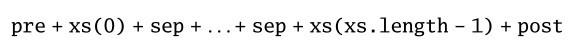

mkString有两个重载的变种，让我们不必填写部分或全部入参。第一个变种只接收一个分隔字符串：  
`xs mkString sep equals xs mkString("",sep,"")`  
第二个变种可以什么入参都不填：  
`xs.mkString equals xs mkString ""`  
下面是一些例子：

In [175]:
abcde mkString ("[",",","]")

res174: String = "[a,b,c,d,e]"

In [176]:
abcde mkString ""

res175: String = "abcde"

In [177]:
abcde.mkString

res176: String = "abcde"

In [178]:
abcde mkString ("List(",", ",")")

res177: String = "List(a, b, c, d, e)"

mkString方法还有别的变种，比如addString，这个方法将构建出来的字符串追加到一个StringBuilder对象，[6]而不是作为结果返回：

In [179]:
val buf = new StringBuilder

buf: StringBuilder = StringBuilder()

In [180]:
abcde addString (buf, "(",";",")")

res179: StringBuilder = StringBuilder(
  '(',
  'a',
  ';',
  'b',
  ';',
  'c',
  ';',
  'd',
  ';',
  'e',
  ')'
)

mkString和addString这两个方法继承自List的超特质Traversable，因此它们也可以用在所有其他集合类型上。

### 转换列表：iterator、toArray、copyToArray
为了在扁平的数组世界和递归的列表世界之间做数据转换，可以使用List类的toArray和Array类的toList方法：

In [181]:
val arr = abcde.toArray

arr: Array[Char] = Array('a', 'b', 'c', 'd', 'e')

In [182]:
arr.toList

res181: List[Char] = List('a', 'b', 'c', 'd', 'e')

还有一个copyToArray方法可以将列表中的元素依次复制到目标数组的指定位置。如下操作：  
`xs copyToArray (arr, start)`

将列表xs的所有元素复制至数组arr，从下标start开始。我们必须确保目标数组足够大，能够容纳整个列表。参考下面的例子：

In [183]:
val arr2 = new Array[Int](10)

arr2: Array[Int] = Array(0, 0, 0, 0, 0, 0, 0, 0, 0, 0)

In [184]:
List(1,2,3) copyToArray(arr2, 3)

In [185]:
arr2

res184: Array[Int] = Array(0, 0, 0, 1, 2, 3, 0, 0, 0, 0)

最后，如果要通过迭代器访问列表元素，可以用iterator方法：

In [186]:
val it = abcde.iterator

it: Iterator[Char] = non-empty iterator

In [187]:
it.next

res186: Char = 'a'

In [188]:
it.next

res187: Char = 'b'

例子：归并排序

之前我们介绍的插入排序写起来很简洁，不过效率并不是很高。它的平均复杂度跟输入列表的长度的平方成正比。更高效的算法是归并排序（merge sort）。

快速通道

这个例子是对分治原则和柯里化的另一次展示，同时也用来探讨算法复杂度的问题。不过，如果你想在初读本书时更快完成，可以安全地跳到16.7节。

归并排序的机制如下：首先，如果列表有零个或一个元素，那么它已然是排好序的，因此列表可以被直接返回。更长一些的列表会被切分成两个子列表，每个子列表各 含约一半原列表的元素。每个子列表被递归地调用同一个函数来排序，然后两个排好序的子列表会通过一次归并操作合在一起。

要实现一个通用的归并排序实现，要允许被排序列表的元素类型和用来比较元素大小的函数是灵活可变的。通过参数将这两项作为参数传入，就得到了最灵活的函数。最终的实现参考示例16.1。

msort 的复杂度为（n log（n）），其中n为输入列表的长度。要搞清楚为什么，注意我们将列表切分成两个子列表，以及将两个排好序的列表归并到一起，这两种操作消耗的时间都 跟列表长度成正比。每次对msort的递归调用都会对输入的元素数量减半，因此差不多需要log（n）次连续的递归调用直到到达长度为1的列表这个基本 case。不过，对更长的列表而言，每次调用都会进一步生成两次调用。所有这些加在一起，在log（n）层的调用当中，原始列表的每个元素都会参与一次切 分操作和一次归并操作。

这样一来，每个调用级别的总成本也是跟n成正比的。由于有log（n）层调用，我们得到的总成本为n log（n）。这个成本跟列表中预算的初始分布无关，因此最差情况的成本跟平均成本相同。归并排序的这个性质让它成为很有吸引力的算法。

In [189]:
def msort[T](less: (T, T) => Boolean)(xs: List[T]): List[T] = {
    def merge(xs: List[T], ys: List[T]): List[T] = (xs, ys) match {
        case (Nil, _) => ys
        case (_, Nil) => xs
        case (x :: xs1, y :: ys1) =>
            if(less(x,y)) x :: merge(xs1, ys)
            else y :: merge(xs, ys1)
    }
    val n = xs.length / 2
    if(n==0) xs
    else {
        val (ys, zs) = xs splitAt n
        merge(msort(less)(ys), msort(less)(zs))
    }
}

defined function msort

In [190]:
msort((x: Int,y: Int) => x < y) (List(5,7,1,3))

res189: List[Int] = List(1, 3, 5, 7)

msort函数是我们在9.3节讨论的柯里化概念的经典案例。柯里化让我们可以很容易将函数定制为一种采用特定比较函数的特例。参考下面的例子：

In [191]:
val intSort = msort((x: Int, y: Int) => x < y) _

intSort: List[Int] => List[Int] = ammonite.$sess.cmd190$Helper$$Lambda$3461/1571120022@10115ae

In [192]:
intSort(List(5,7,1,3))

res191: List[Int] = List(1, 3, 5, 7)

这里的intSort变量指向一个接收整数列表并以数值顺序排列的函数。我们在8.6节曾经介绍过，下画线表示一个缺失的参数列表。在本例中，缺失的参数是应该被排序的列表。再来看另一个例子，我们可以这样来定义对整数列表按数值倒序排列的函数：

In [193]:
val reverseIntSort = msort((x: Int, y: Int) => x > y) _

reverseIntSort: List[Int] => List[Int] = ammonite.$sess.cmd192$Helper$$Lambda$3471/1754539477@c03a604

In [194]:
reverseIntSort(List(5,7,1,3))

res193: List[Int] = List(7, 5, 3, 1)

由于我们已经通过柯里化给出了比较函数，接下来只需要在调用intSort或reverseIntSort函数时给出要排序的列表即可。参考下面的例子：

In [195]:
val mixedInts = List(4, 1, 9, 0, 5, 8, 3, 6, 2, 7)

mixedInts: List[Int] = List(4, 1, 9, 0, 5, 8, 3, 6, 2, 7)

In [196]:
intSort(mixedInts)

res195: List[Int] = List(0, 1, 2, 3, 4, 5, 6, 7, 8, 9)

In [197]:
reverseIntSort(mixedInts)

res196: List[Int] = List(9, 8, 7, 6, 5, 4, 3, 2, 1, 0)

## 16.7 List类的高阶方法
许多对列表的操作都有相似的结构，有一些模式反复出现。例如：以某种方式对列表中的每个元素做转换，验证列表中所有元素是否都满足某种性质，从列表元素中提取满足某个指定条件的元素，或用某种操作符来组合列表中的元素。在Java中，这些模式通常要通过固定写法的for循环或while循环来组装。而Scala允许我们使用高阶操作符[7]来更精简、更直接地表达，这些高阶操作是通过List类的方法实现的。本节我们将对这些高阶操作进行探讨。
### 对列表作映射：map、flatMap和foreach

xs map f这个操作将类型为List[T]的列表xs和类型为T => U的函数f作为操作元。它返回一个通过应用f到xs的每个元素后得到的列表。例如：

In [198]:
List(1, 2, 3) map (_ + 1)

res197: List[Int] = List(2, 3, 4)

In [199]:
val words = List("the", "quick", "brown", "fox")

words: List[String] = List("the", "quick", "brown", "fox")

In [200]:
words map (_.length)

res199: List[Int] = List(3, 5, 5, 3)

In [201]:
words map (_.toList.reverse.mkString)

res200: List[String] = List("eht", "kciuq", "nworb", "xof")

flatMap操作符跟map类似，不过它要求右侧的操作元是一个返回元素列表的函数。它将这个函数应用到列表的每个元素，然后将所有结果拼接起来返回。下面的例子展示了map和flatMap的区别：

In [202]:
words map (_.toList)

res201: List[List[Char]] = List(
  List('t', 'h', 'e'),
  List('q', 'u', 'i', 'c', 'k'),
  List('b', 'r', 'o', 'w', 'n'),
  List('f', 'o', 'x')
)

In [203]:
words flatMap (_.toList)

res202: List[Char] = List(
  't',
  'h',
  'e',
  'q',
  'u',
  'i',
  'c',
  'k',
  'b',
  'r',
  'o',
  'w',
  'n',
  'f',
  'o',
  'x'
)

我们可以看到，map返回的是列表的列表，而flatMap返回的是所有元素拼接起来的单个列表。
下面这个表达式也体现了map和flatMap的区别与联系，这个表达式构建的是一个满足 1≤ j＜i＜5 的所有对偶（i, j）：

In [204]:
List.range(1, 5)

res203: List[Int] = List(1, 2, 3, 4)

In [205]:
List.range(1, 5) flatMap (i => List.range(1, i) map (j => (i, j)))

res204: List[(Int, Int)] = List((2, 1), (3, 1), (3, 2), (4, 1), (4, 2), (4, 3))

In [206]:
List.range(1, 5) map (i => List.range(1, i) map (j => (i, j)))

res205: List[List[(Int, Int)]] = List(
  List(),
  List((2, 1)),
  List((3, 1), (3, 2)),
  List((4, 1), (4, 2), (4, 3))
)

List.range 是一个用来创建某个区间内所有整数的列表的工具方法。在本例中，我们用到了两次：一次是生成从1（含）到5（不含）的整数列表，另一次是生成从1到i的整 数列表，其中i是来自第一个列表的每个元素。表达式中的map生成的是一个由元组（i, j）组成的列表，其中j ＜ i。外围的flatMap对1到5之间的每一个i生成一个列表，并将结果拼接起来。也可以用for表达式来构建同样的列表：

In [207]:
for(i <- List.range(1, 5); j <- List.range(1, i)) yield(i, j)

res206: List[(Int, Int)] = List((2, 1), (3, 1), (3, 2), (4, 1), (4, 2), (4, 3))

你将在第23章了解到更多关于for表达式和列表操作的内容。

第三个映射类的操作是foreach。不同于map和flatMap,foreach要求右操作元是一个过程（结果类型为Unit的函数）。它只是简单地将过程应用到列表中的每个元素。整个操作本身的结果类型也是Unit，并没有列表类型的结果被组装出来。参考下面这个精简的将列表中所有数值加和的例子：

In [208]:
var sum = 0

sum: Int = 15

In [209]:
List(1,2,3,4,5) foreach (sum += _)

In [210]:
sum

res209: Int = 15

### 过滤列表：filter、partition、find、takeWhile、dropWhile和span

“xs filter p”这个操作的两个操作元分别是类型为List[T]的xs和类型为T => Boolean的前提条件函数p。这个操作将交出xs中所有p（x）为true的元素x。例如：

In [211]:
List(1,2,3,4,5) filter (_ % 2 == 0)

res210: List[Int] = List(2, 4)

In [212]:
words filter (_.length == 3)

res211: List[String] = List("the", "fox")

partition方法跟filter很像不过返回的是一对列表。其中一个包含所有前提条件为true的元素，另一个包含所有前提条件为false的元素。它满足如下等式：  
`xs partition p`等于`(xs filter p,xs filter (!p(_)))`  
参考下面的例子：

In [213]:
List(1,2,3,4,5) partition (_ % 2 == 0)

res212: (List[Int], List[Int]) = (List(2, 4), List(1, 3, 5))

find方法跟filter也很像，不过它返回满足给定前提条件的第一个元素，而不是所有元素。xs find p这个操作接收列表xs和前提条件函数p两个操作元，返回一个可选值。如果xs中存在一个元素x满足p（x）为true，那么就返回Some（x）。而如果对于所有元素而言p都为false，那么则返回None。来看一些例子：

In [214]:
List(1,2,3,4,5) find(_%2==0)

res213: Option[Int] = Some(2)

In [215]:
List(1,2,3,4,5) find(_<=0)

res214: Option[Int] = None

takeWhile和dropWhile操作符也将一个前提条件作为右操作元。xs takeWhile p操作返回列表xs中连续满足p的最长前缀。同理，xs dropWhile p操作将去除列表xs中连续满足p的最长前缀。来看一些例子：

In [216]:
List(1,2,3,-4,5) takeWhile(_ > 0)

res215: List[Int] = List(1, 2, 3)

In [217]:
words dropWhile(_ startsWith "t")

res216: List[String] = List("quick", "brown", "fox")

span方法将takeWhile和dropWhile两个操作合二为一，就像splitAt将take和drop合二为一一样。它返回一堆列表，满足如下等式：  
`xs span p` 等于 `xs takeWhile p,xs dropWhile p`  
跟splitAt一样，span同样不会重复遍历xs:

In [218]:
List(1,2,3,-4,5) span (_ > 0)

res217: (List[Int], List[Int]) = (List(1, 2, 3), List(-4, 5))

对列表的前提条件检查：forall和exists

xs forall p这个操作接收一个列表xs和一个前提条件p作为入参。如果列表中所有元素都满足p就返回true。与此相反，xs exists p操作返回true的要求是xs中存在一个元素满足前提条件p。例如，要搞清楚一个以列表的列表表示的矩阵里是否存在一行的元素全为0：

In [219]:
def hasZeroRow(m: List[List[Int]]) = m exists (row => row forall (_ == 0))

defined function hasZeroRow

In [220]:
diag3

res219: List[List[Int]] = List(List(1, 0, 0), List(0, 1, 0), List(0, 0, 1))

In [221]:
hasZeroRow(diag3)

res220: Boolean = false

In [222]:
val diag4 = diag3 ::: List(List(0, 0, 0))

diag4: List[List[Int]] = List(
  List(1, 0, 0),
  List(0, 1, 0),
  List(0, 0, 1),
  List(0, 0, 0)
)

In [223]:
hasZeroRow(diag4)

res222: Boolean = true

### 折叠列表：/：和:\
对列表的另一种常见操作是用某种操作符合并元素。例如：  
`sum(List(a,b,c))` 等于 `0 + a + b + c`  
这是折叠操作的特例：

In [224]:
def sum(xs: List[Int]): Int = (0 /: xs) (_ + _)

defined function sum

In [225]:
sum(List(2,3,4))

res224: Int = 9

同理：  
`product(List(a,b,c))` 等于 ` 1*a*b*c `   
这也是折叠操作的一个特例：

In [226]:
def product(xs: List[Int]): Int = (1 /: xs) (_ * _)

defined function product

In [227]:
product(List(2,3,4))

res226: Int = 24

左折叠（fold left）操作“（z /: xs）（op）”涉及三个对象：起始值z、列表xs和二元操作op。折叠的结果是以z为前缀，对列表的元素依次连续应用op。例如：  
`(z /: List(a,b,c))(op)` 等于 `op(op(op(z,a),b),c)`  
或者用图形化表示就是：  
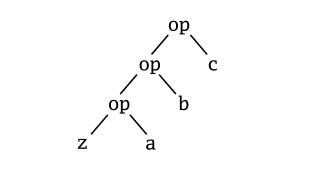  
还有个例子可以说明/：的用处。为了把列表中的字符串表示的单词拼接起来，在当中和最前面加上空格，可以：

In [228]:
("" /: words) (_ + " " + _)

res227: String = " the quick brown fox"

这里会在最开始多出一个空格。要去除这个空格，可以像下面这样简单改写：

In [229]:
(words.head /: words.tail) (_ + " " + _)

res228: String = "the quick brown fox"

/：操作符产生一棵往左靠的操作树（之所以用斜杠/也是为了体现这一点）。同理，:\这个操作产生一棵往右靠的操作树。例如：  
`(List(a,b,c) :\ z) (op)` 等于 `op(a,op(b,op(c,z)))`  
或者图形化表示就是：  
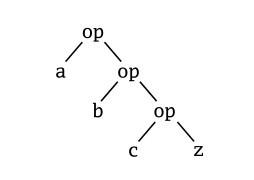  
:\操作符读作右折叠（fold right）。它涉及跟左折叠一样的三个操作元，不过前两个出现的顺序是颠倒的：第一个操作元是要折叠的列表，而第二个操作元是起始值。
对结合性的操作而言，左折叠和右折叠是等效的，不过可能存在执行效率上的差异。可以设想一下flatten方法对应的操作，这个操作是将一个列表的列表中的所有元素拼接起来。可以用左折叠也可以用右折叠来完成：

In [230]:
def flattenLeft[T](xss: List[List[T]]) =
    (List[T]() /: xss) (_ ::: _)

defined function flattenLeft

In [231]:
def flattenRight[T](xss: List[List[T]]) =
    (xss :\ List[T]()) (_ ::: _)

defined function flattenRight

由于列表拼接xs ::: ys的执行时间跟首个入参xs的长度成正比，用右折叠的flattenRight比用左折叠的flattenLeft更高效。左折叠在这里的问题是 flattenLeft（xss）需要复制首个元素列表xss.head n-1次，其中n为列表xss的长度。

注意上述两个flatten版本都需要对表示折叠起始值的空列表做类型注解。这是由于Scala类型推断程序的一个局限，不能自动推断出正确的列表类型。如果漏掉了类型注解，会得到如下结果：
```scala
def flattenRight[T](xss: List[List[T]]) =
    (xss :\ List()) (_ ::: _)


cmd110.sc:2: type mismatch;
 found   : List[T]
 required: List[Nothing]
    (xss :\ List()) (_ ::: _)
                     ^Compilation Failed

Compilation Failed
```
要搞清楚为什么类型推断程序出了问题，需要了解折叠方法的类型，以及它们是如何实现的。这个留到16.10节再探讨。

最后，虽然/：和：\操作符的一个优势是斜杠的方向形象地表示出往左或往右靠的树形结构，同时冒号的结合性也将起始值放在了表达式中跟树中一样的位置，可能有的人会觉得这并不直观。只要你想，你也可以用foldLeft和foldRight这样的方法名，这两个也是定义在List类的方法。

例子：用fold反转列表

在本章前面的部分，我们看到了reverse方法的实现，名为rev，其运行时间是待反转列表长度的平方级。现在来看一个reverse的不同实现，运行开销是线性的。原理是基于下面的机制来做左折叠：  
`def reverseLeft[T](xs: List[T]) = (startvalue /: xs) (operation)`  
剩下需要补全的就是startvalue（起始值）和operation（操作）的部分了。事实上，可以用更简单的例子来推导出来。为了推导出startvalue正确的取值，可以用最简单的列表List（）开始：  
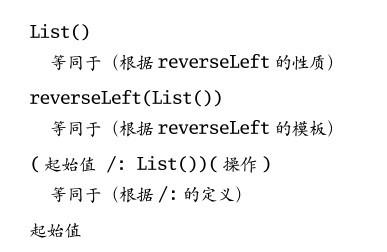  
因此，startvalue必须是List（）。要推导出第二个操作元，可以拿仅次于List（）的最小列表作为样例。我们已经知道startvalue是List（），可以做如下的演算：  
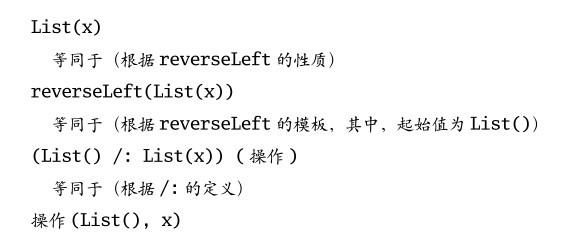  
因此，operation（List（）, x）等于List（x），而List（x）也可以写作x ::List（）。这样我们就发现可以基于：：操作符把两个操作元反转一下来得到operation（这个操作有时被称作“sonc”，即把：：的 “cons”反过来念）。于是我们得到如下reverseLeft的实现：

In [232]:
def reverseLeft[T](xs: List[T]) = 
    (List[T]() /: xs) {(ys,y) => y :: ys}

defined function reverseLeft

同样地，为了让类型推断程序正常工作，这里的类型注解List[T]（）是必需的。如果我们分析reverseLeft的时间复杂度，会发现它执行这个常量时间操作（即“snoc”）n次。因此，reverseLeft的时间复杂度是线性的。

### 列表排序：sortWith

xs sortWith before这个操作对列表xs中的元素进行排序，其中“xs”是列表，而“before”是一个用来比较两个元素的函数。表达式x before y对于在预期的排序中x应出现在y之前的情况应返回true。例如：

In [233]:
List(1,-3,4,2,6) sortWith (_ < _)

res232: List[Int] = List(-3, 1, 2, 4, 6)

In [234]:
words sortWith (_.length > _.length)

res233: List[String] = List("quick", "brown", "the", "fox")

注意，sortWith执行的是跟前一节的msort算法类似的归并排序。不过sortWtih是List类的方法，而msort定义在列表之外。

## 16.8 List对象的方法
到目前为止，我们在本章介绍的所有操作都是List类的方法，因此我们其实是在每个具体的列表对象上调用它们。还有一些方法是定义在全局可访问对象scala.List上的，这是List类的伴生对象。某些操作是用于创建列表的工厂方法，另一些是对特定形状的列表进行操作。这两类方法在本节都会介绍到。

### 从元素创建列表：List.apply

我们已经看到过不止一次诸如List（1, 2, 3）这样的列表字面量。这样的语法并没有什么特别之处。List（1, 2, 3）这样的字面量只不过是简单地将对象List应用到元素1、2、3而已。也就是说，它跟List.apply（1, 2, 3）是等效的：

In [235]:
List.apply(1, 2, 3)

res234: List[Int] = List(1, 2, 3)

### 创建数值区间：List.range

我们在介绍map和flatMap的时候曾经用到过range方法，它创建的是一个包含一个区间的数值的列表。这个方法最简单的形式是 List.rang（from, until），创建一个包含了从from开始递增到until减1的数的列表。所以终止值until并不是区间的一部分。

range方法还有两一个版本，接收step作为第三个参数。这个操作交出的列表元素是从from开始，间隔为step的值。step可以是正值也可以是负值：

In [236]:
List.range(1, 5)

res235: List[Int] = List(1, 2, 3, 4)

In [237]:
List.range(1,9,2)

res236: List[Int] = List(1, 3, 5, 7)

In [238]:
List.range(9,1,-3)

res237: List[Int] = List(9, 6, 3)

### 创建相同元素的列表：List.fill
fill方法创建包含零个或多个同一个元素拷贝的列表。它接收两个参数：要创建的列表长度和需要重复的元素。两个参数各自以不同的参数列表给出：

In [239]:
List.fill(5)('a')

res238: List[Char] = List('a', 'a', 'a', 'a', 'a')

In [240]:
List.fill(3)("hello")

res239: List[String] = List("hello", "hello", "hello")

如果我们给fill的参数多于1个，那么它就会创建多维的列表。也就是说，它将创建出列表的列表、列表的列表的列表，等等。多出来的这些参数要放在第一个参数列表中。

In [241]:
List.fill(2,3)('b')

res240: List[List[Char]] = List(List('b', 'b', 'b'), List('b', 'b', 'b'))

### 表格化一个函数：List.tabulate
tabulate方法创建的是一个根据给定的函数计算的元素的列表。其入参跟List.fill的一样：第一个参数列表给出要创建列表的维度，而第二个参数列表描述列表的元素。唯一的区别是，元素值不再是固定的，而是从函数计算得来：

In [242]:
val squares = List.tabulate(5)(n => n * n)

squares: List[Int] = List(0, 1, 4, 9, 16)

In [243]:
val multiplication = List.tabulate(5, 5)(_ * _)

multiplication: List[List[Int]] = List(
  List(0, 0, 0, 0, 0),
  List(0, 1, 2, 3, 4),
  List(0, 2, 4, 6, 8),
  List(0, 3, 6, 9, 12),
  List(0, 4, 8, 12, 16)
)

### 拼接多个列表：List.concat
concat方法将多个列表拼接在一起。要拼接的列表通过concat的直接入参给出：

In [244]:
List.concat(List('a', 'b'), List('c'))

res243: List[Char] = List('a', 'b', 'c')

In [245]:
List.concat(List(),List('b'), List('c'))

res244: List[Char] = List('b', 'c')

In [246]:
List.concat()

res245: List[Nothing] = List()

## 16.9 同时处理多个列表
元组的zipped方法将若干通用的操作一般化了，它们不再只是针对单个列表而是能同时处理多个列表。其中一个通用操作是map。对两个zip在一起的列表调用map的效果是对元素一组一组地做映射，而不是单个元素。每个列表的第一个元素是一对，第二个元素是一对，以此类推，列表有多长，就有多少对。参考下面的例子：

In [247]:
(List(10, 20), List(3, 4, 5)).zipped.map(_ * _)

res246: List[Int] = List(30, 80)

注意第二个列表的三个元素被丢弃了。zipped方法只会把所有列表中都有值的元素zip在一起，多出来的元素会被丢弃。
同理，exists和forall也有zip起来的版本。它们跟单列表的版本做的事情相同，只不过它们操作的是多个列表而不是一个：

In [248]:
(List("abc","de"), List(3, 2)).zipped.forall(_.length == _)

res247: Boolean = true

In [249]:
(List("abc","de"), List(3, 2)).zipped.exists(_.length != _)

res248: Boolean = false

快速通道  
在本章的下一节（也是最后一节），我们将介绍Scala类型推断算法的原理。如果你目前对于这样的细节并不关心，可以跳过下一节直接进入结语（339页）。

## 16.10 理解Scala的类型推断算法
我们之前用到的sortWith和msort的区别在于它们可接收的比较函数语法。
我们来比较一下：

In [250]:
msort((x: Char, y: Char) => x > y)(abcde)

res249: List[Char] = List('e', 'd', 'c', 'b', 'a')

In [251]:
abcde sortWith (_ > _)

res250: List[Char] = List('e', 'd', 'c', 'b', 'a')

这两个表达式是等效的，不过前者采用的比较函数字面量版本较长，用到了带名参数和显式类型声明。而后者采用了更精简的写法（_ > \_），其中带名参数被替换成了下画线。当然，我们也可以在sortWith调用中使用前一种较长的写法来给出比较函数。
不过，这个较短的版本并不适用于msort。  
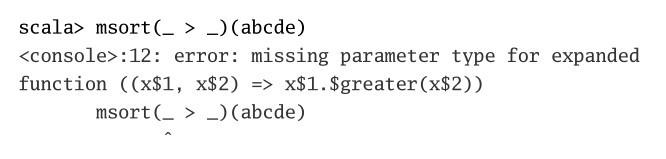

In [252]:
abcde sortWith ((x: Char, y: Char) => x > y)

res251: List[Char] = List('e', 'd', 'c', 'b', 'a')

要搞清楚为什么会这样，我们需要知道Scala类型推断算法的一些细节。Scala的类型推断是基于程序流（flow based）的。对于方法调用m（args），类型推断算法首先检查m的类型是否已知。如果m的类型已知，那么这个类型信息就被用于推断入参的预期类型。 例如，在abcde.sortWith（_ > \_）中， abcde的类型为List[Char]。因此，类型推断算法知道sortWith是一个接收类型为（Char, Char） => Boolean的入参且产出一个类型为List[Char]的结果的方法。由于该函数入参的参数类型是已知的，并不需要显式地写出来。基于类型推断算法所 了解的关于sortWith的信息，它可以推导出（_ > \_）应该被展开成（（x: Char, y: Char） => x > y），其中x和y是任意没有被用过的新名称。

现在我们来看第二个case,msort（_ > \_）（abcde）。msort的类型是一个经过柯里化的、多态的[8]方法类型，它接收一个类型为（T, T） => Boolean的入参，产出一个从List[T]到List[T]的函数，其中T是某个当前未知的类型。msort需要先用一个类型参数实例化以后才能被应用到它的入参上。

由于msort的确切示例类型暂时未知，类型推断算法不能用这个信息来推断它的首个入参的类型。对于这种情况，类型推断算法会改变策略，它改为先检查方法入参来决定方法的正确实例类型。然而，当它去对（_ > \_）这个简写的函数字面量做类型检查时，由于我们没有提供任何关于用下画线表示的函数参数类型的信息，类型检查是失败的。
解决这个问题的一种方式是给msort传一个显式的类型参数，如：

In [253]:
msort[Char](_ > _)(abcde)

res252: List[Char] = List('e', 'd', 'c', 'b', 'a')

由于msort的正确实例类型现在是已知的了，类型推断算法可以用它来推断入参的类型。另一个可能的解决方案是重写msort方法，让它的两个参数交换位置：

In [254]:
def msortSwapped[T](xs: List[T])(less: (T, T) => Boolean) : List[T] = {
    def merge(xs: List[T],ys: List[T]) : List[T] = (xs, ys) match {
        case (Nil, _) => ys
        case (_, Nil) => xs
        case (x::xs1, y::ys1) => 
            if(less(x,y)) x::merge(xs1,ys)
            else y::merge(xs,ys1)
    }
    val n = xs.length / 2
    if(n == 0) xs
    else{
        val (xs1,xs2) = xs splitAt n
        merge(msortSwapped(xs1)(less),msortSwapped(xs2)(less))
    }
}

defined function msortSwapped

这样的类型推断也能成功：

In [255]:
msortSwapped(abcde)(_ > _)

res254: List[Char] = List('e', 'd', 'c', 'b', 'a')

怎么做到的？类型推断算法使用了首个参数abcde的已知类型来判定msortSwapped的类型参数。一旦msortSwapped的确切类型已知，它就能被用于推断第二个入参（_ > \_）的类型。

一般来说，当类型推断算法需要推断一个多态方法的类型参数时，它会考虑第一个参数列表里的所有入参的类型，但到此为止。由于msortSwapped是一个柯里化的方法，它有两个参数列表，第二个入参（即函数值）并不会用来判定方法的类型参数。

这样的类型推断机制引导出如下的类库设计原则：当我们设计一个接收某些非函数的入参和一个函数入参时，将函数入参单独放在最后一个参数列表中。这样一来，方法的正确实例类型可以从那些非函数入参推断出来，而这个类型又能被继续用于对函数入参做类型检查。这样做的净收益是方法的使用者需要给出的类型信息更少， 因而在编写函数字面量时可以更精简。

接下来再看看折叠这个更复杂的操作。为什么我们需要像330页的flattenRight方法的方法体内的那段表达式那样显式地给出类型参数呢？

In [256]:
def flattenRight[T](xss: List[List[T]]) =
    (xss :\ List[T]()) (_ ::: _)

defined function flattenRight

右折叠操作的类型以两个类型变量的形式呈现出多态。比如下面这个表达式：  
`(xs :\ z) (op)`  
xs 的类型一定是某个任意类型A的列表，比如说xs: List[A]。起始值z可以是某个不一样的类型B。这样一来操作op一定是接收类型分别为A和B的两个入参，返回类型为B的结果，即op: （A, B） => B。由于z的类型跟列表xs的类型不相关，类型推断算法就没有任何关于z的上下文信息。

现在我们来看330页的那个错误版本的flattenRight：
```scala
def flattenRight[T](xss: List[List[T]]) =

    (xss :\ List()) (_ ::: _)

cmd129.sc:2: type mismatch;
 found   : List[T]
 required: List[Nothing]
    (xss :\ List()) (_ ::: _)
                     ^Compilation Failed

Compilation Failed
```

这个折叠操作中的起始值z是一个空列表List（），当没有任何其他额外信息的情况下，它的类型被推断为List[Nothing]。因此，类型推断算法会推断出本次折叠操作的类型B为List[Nothing]。这样一来，折叠操作中的（_ ::: \_）预期应该满足如下类型：  
`(List[T], List[Nothing]) => List[Nothing]`  
这的确是本次操作的一个可能的类型，但并不是一个十分有用的版本！它表达的意思是这个操作永远接收一个空列表作为第二个入参，同时永远产出一个空列表作为结果。

换句话说，这里的类型推断算法过早地判定了List（）的类型，它应该等看到操作op的类型以后再做决定。**因此这个（本可以很有用的）在柯里化的方法调用中只考虑第一个参数列表来判定方法类型的规则是核心问题所在**。另一方面，即便我们可以放宽这个规则，类型推断算法依然无法推算出op的类型，因为它的参数类型没有给出。因此，一个《二十二条军规》的情况出现了，我们只好通过程序员加上显式的类型注解来解决。

这个例子显现出局部的、基于程序流的Scala类型推断机制的局限。在函数式编程语言ML或Haskell中使用的全局的Hindley-Milner风格的类型推断中，并没有这些限制。不过，Scala的局部类型推断对于面向对象的子类型处理相比Hindley-Milner风格要优雅得多。幸运的是，这些局限只在某些边界case出现，且通常很容易通过显式添加类型注解解决。
当我们对多态方法相关的错误提示感到困惑时，添加类型注解也是一个有用的调试技巧。如果不确定是什么引起某个特定的类型错误，只管添加你认为正确的类型参数或其他类型注解就好。这样你应该很快就能看到真正的问题所在。

## 16.11 结语
我们见识了很多处理列表的方法。最基本的操作比如head和tail，初阶操作比如reverse，高阶操作比如map，以及List对象中的工具方法。在这个过程中，我们也了解了Scala的类型推断的原理。

列表是Scala程序中的真正干活儿的工具，所以知道如何使用它们是有好处的。正因为如此，本章花费大量篇幅深入介绍了列表的用法。不过，列表只是Scala支持的集合类型的一种。下一章范围更宽，相对来说也浅一些，会向你展示如何使用各种Scala集合类型。

[1].参考图22.2（473页），一个对列表结构的图形化展示。  
[2].第19章将介绍协变和其他型变的更多细节。  
[3].第19章将会有更多关于类型参数的细节讲解。  
[4].??？这个方法在运行时会抛出scala.NotImplementedError，其结果类型为Nothing，我们可以在开发过程中当作临时实现来用。  
[5].正如我们在10.12节指出的，对偶（pair）是Tuple2的非正式名称。  
[6].这是scala.StringBuilder类，不是java.lang.StringBuilder类。  
[7].这里所说的高阶操作符（high-order operator）指的是用在操作符表示法中的高阶函数。在9.1节提到过，如果一个函数接收一个或多个函数作为参数，那么它就是“高阶”的。  
[8].这里指的是参数多态，不是面向对象编程里常见的子类型多态。——译者注